In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/sample_data/Comcast_telecom_complaints_data.csv")

In [4]:
(data.head(5))

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
data['Date_Index'] = pd.to_datetime(data['Date_month_year'])

In [6]:
data = data.set_index(data['Date_Index'])

In [7]:
data['Date_Index'].value_counts().head(5)

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: Date_Index, dtype: int64

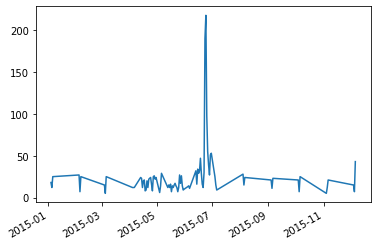

In [8]:
data['Date_Index'].value_counts().plot()

In [9]:
data.groupby(pd.Grouper(freq='M')).size()

Date_Index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

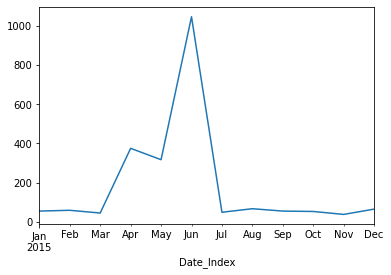

In [10]:
data.groupby(pd.Grouper(freq='M')).size().plot()

In [14]:
data['Customer Complaint'].value_counts(dropna=False)[:9]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Name: Customer Complaint, dtype: int64

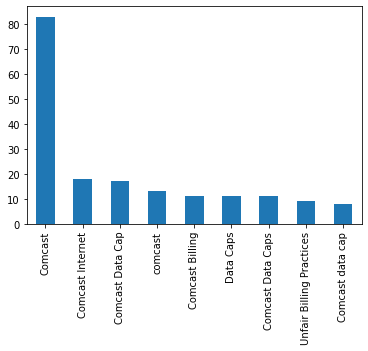

In [15]:
data['Customer Complaint'].value_counts(dropna=False)[:9].plot.bar()

In [16]:
# Listing unique status types
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [17]:
# Applying Lambda
data['Current_Status'] = data['Status'].apply(lambda present_status: "Open" if present_status=="Open" or present_status=="Pending" else "Closed")

In [18]:
state_wise_complaints = data.groupby(['State','Current_Status']).size().unstack().fillna(0.0)

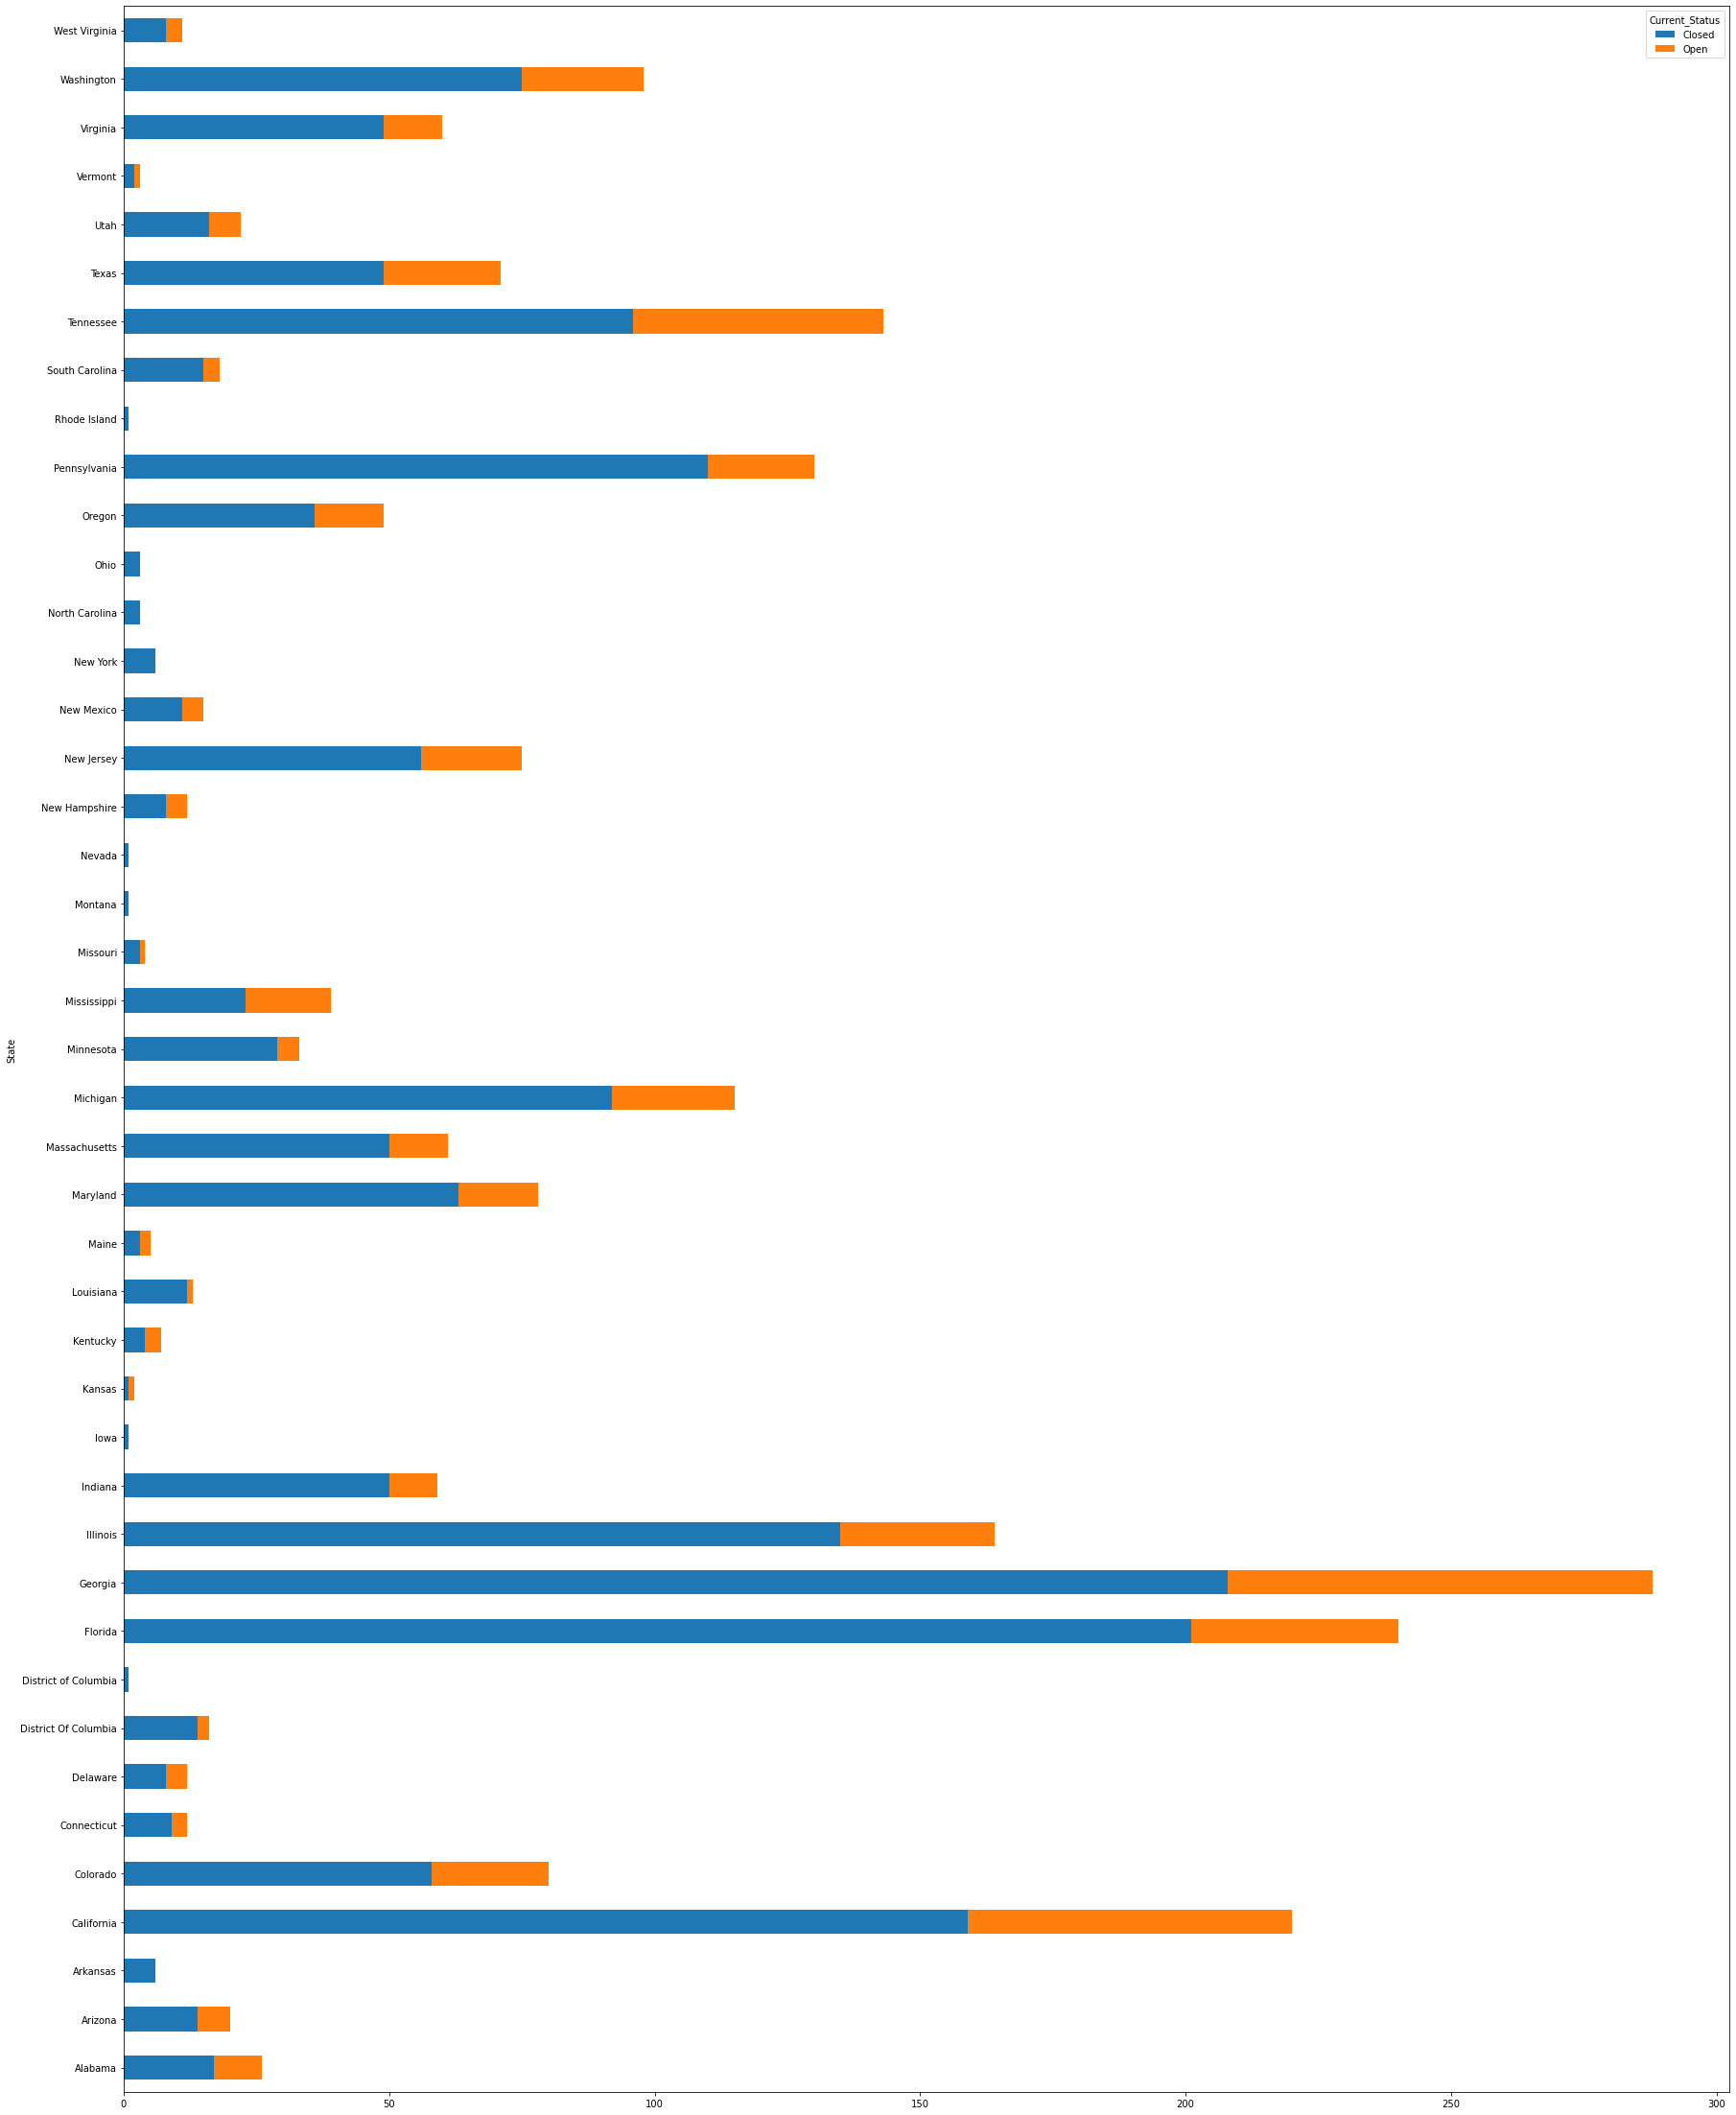

In [19]:
# Plotting a stacked bar chart horizontally
state_wise_complaints.plot(kind = 'barh', figsize=(30,40), stacked='true')

In [20]:
#State with maximum complaint
data.groupby(['State']).size().sort_values(ascending=False).to_frame().rename({0: "Total number of complaints"}, axis=1).head(1)

,Total number of complaints
State,
Georgia,288


In [21]:
state_wise_complaints.sort_values('Closed',axis = 0,ascending=False)

Current_Status,Closed,Open
State,,
Georgia,208.0,80.0
Florida,201.0,39.0
California,159.0,61.0
Illinois,135.0,29.0
Pennsylvania,110.0,20.0
Tennessee,96.0,47.0
Michigan,92.0,23.0
Washington,75.0,23.0
Maryland,63.0,15.0


In [ ]:
#Which state has the highest percentage of resolved complaints
state_wise_complaints['Resolved_complaint_percentage'] = state_wise_complaints['Closed']/state_wise_complaints['Closed'].sum()*100
state_wise_complaints['Unresolved_complaint_percentage'] = state_wise_complaints['Open']/state_wise_complaints['Open'].sum()*100
state_wise_complaints.sort_values('Unresolved_complaint_percentage',axis = 0,ascending=False).head(1)

In [28]:
df_unresolved = data.groupby(['State',"Current_Status"]).size().unstack().sort_values(by='Open', ascending =False)
df_unresolved['Unresolved'] = df_unresolved['Open']/df_unresolved['Open'].sum()*100
df_unresolved

Current_Status,Closed,Open,Unresolved
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Michigan,92.0,23.0,4.448743
Washington,75.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


In [23]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
df = data.groupby(['Received Via',"Current_Status"]).size().unstack()
df['Resolved'] = df['Closed']/df['Closed'].sum()*100
df

Current_Status,Closed,Open,Resolved
Received Via,,,
Customer Care Call,864,255,50.615114
Internet,843,262,49.384886


Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

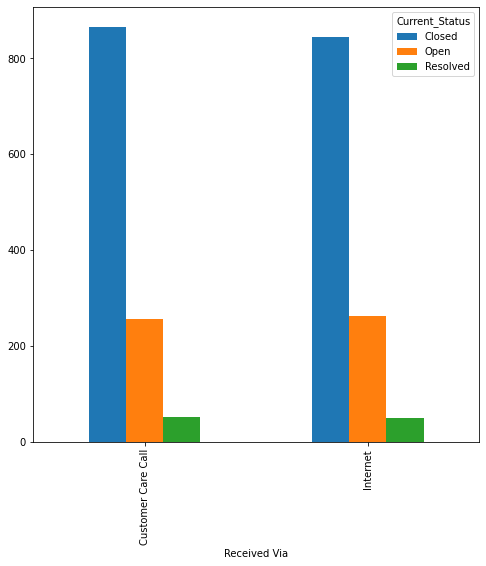

In [24]:
df.plot(kind="bar", figsize=(8,8))